In [1]:
import pandas as pd 
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import edward as ed
%matplotlib inline
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [2]:
iris = datasets.load_iris()
iris_X = iris.data
iris_y = iris.target
np.unique(iris_y)

array([0, 1, 2])

In [3]:
# Importing the dataset
iris_df = pd.read_csv('C:/Users/Rhea/Documents/Bayesian Modeling/Datasets/iris/iris.csv',names=['SepalLengthCm','SepalWidthCm',
                                                                                               'PetalLengthCm','PetalWidthCm','Species'])

In [4]:
iris_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
# Number of instances (rows) that belong to each class as an absolute count.
iris_df.groupby('Species').size()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

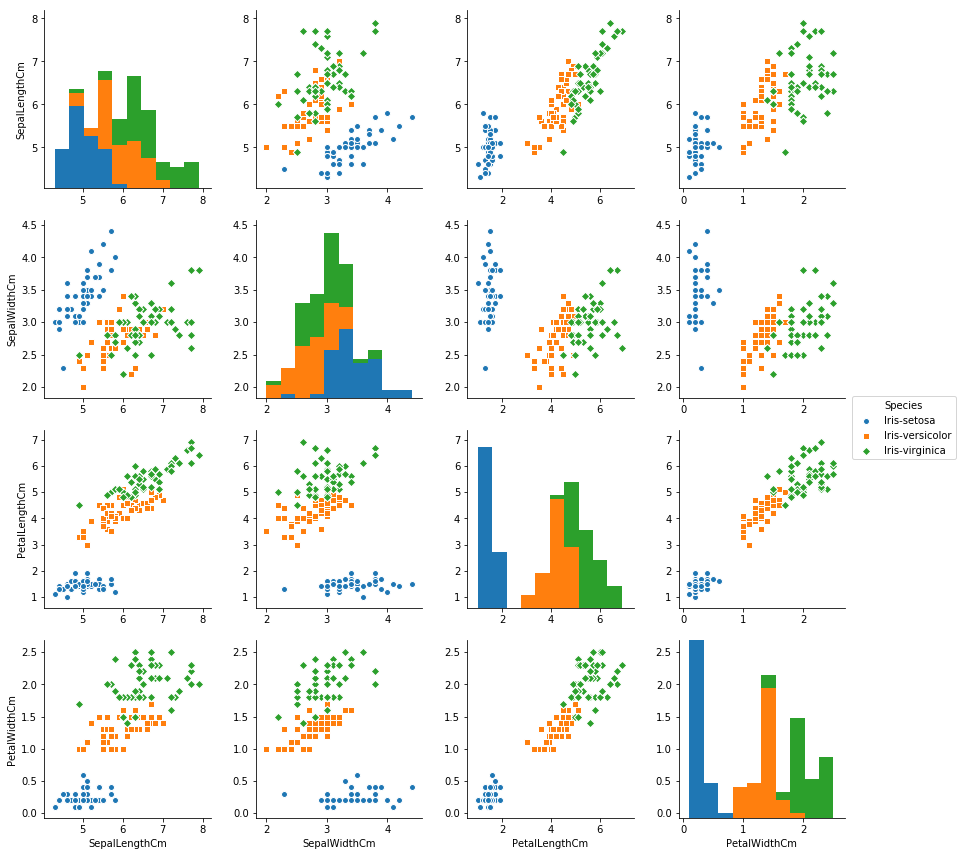

In [6]:
plt.figure()
sns.pairplot(iris_df, hue = "Species", size=3, markers=["o", "s", "D"])
plt.show()

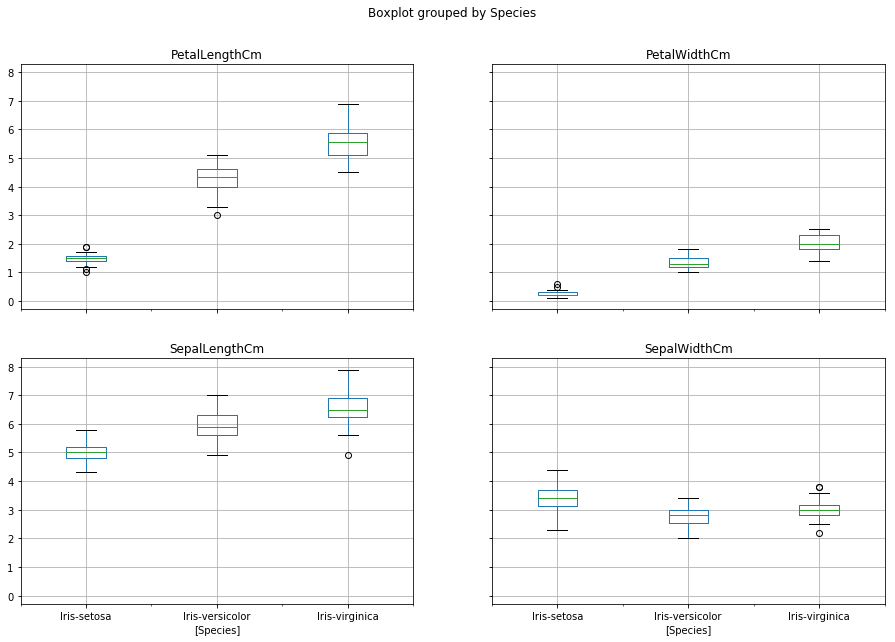

In [7]:
plt.figure()
iris_df.boxplot(by="Species", figsize=(15, 10))
plt.show()

C:\Users\Rhea\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: 'pandas.tools.plotting.radviz' is deprecated, import 'pandas.plotting.radviz' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


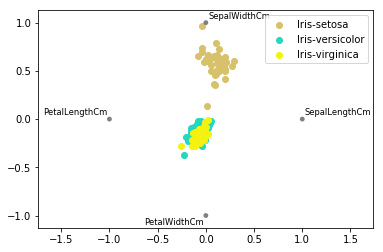

In [50]:
#Visualize multi dimensional cluster
from pandas.tools.plotting import radviz
radviz(iris_df, "Species")

#### k-Nearest neighbors classifier

The simplest possible classifier is the nearest neighbor: given a new observation X_test, find in the training set (i.e. the data used to train the estimator) the observation with the closest feature vector

KNN can be used for both classification and regression predictive problems. KNN falls in the supervised learning family of algorithms. Informally, this means that we are given a labelled dataset consiting of training observations  (x,y)  and would like to capture the relationship between  x  and  y . More formally, our goal is to learn a function  h:X→Y  so that given an unseen observation  x ,  h(x)  can confidently predict the corresponding output  y .

In the classification setting, the K-nearest neighbor algorithm essentially boils down to forming a majority vote between the K most similar instances to a given “unseen” observation. Similarity is defined according to a distance metric between two data points. The k-nearest-neighbor classifier is commonly based on the Euclidean distance between a test sample and the specified training samples.

##### Algorithm steps:
STEP 1: Choose the number K of neighbors

STEP 2: Take the K nearest neighbors of the new data point, according to your distance metric

STEP 3: Among these K neighbors, count the number of data points to each category

STEP 4: Assign the new data point to the category where you counted the most neighbors

#### Training set and testing set

While experimenting with any learning algorithm, it is important not to test the prediction of an estimator on the data used to fit the estimator as this would not be evaluating the performance of the estimator on new data. This is why datasets are often split into train and test data.

In [8]:
# Split iris data in train and test data
# A random permutation, to split the data randomly
np.random.seed(0)
indices = np.random.permutation(len(iris_X))
iris_X_train = iris_X[indices[:-10]]
iris_y_train = iris_y[indices[:-10]]
iris_X_test  = iris_X[indices[-10:]]
iris_y_test  = iris_y[indices[-10:]]

In [9]:
# Create and fit a nearest-neighbor classifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(iris_X_train, iris_y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [10]:
iris_y_pred=knn.predict(iris_X_test)

In [11]:
print(iris_y_test)
print(iris_y_pred)

[1 1 1 0 0 0 2 1 2 0]
[1 2 1 0 0 0 2 1 2 0]


#### Evaluating Classifier

In [12]:
#Confusion Matrix

In [13]:
cm = confusion_matrix(iris_y_test, iris_y_pred)
cm

array([[4, 0, 0],
       [0, 3, 1],
       [0, 0, 2]], dtype=int64)

In [14]:
#Accuracy
accuracy = accuracy_score(iris_y_test, iris_y_pred)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of our model is equal 90.0 %.
